In [243]:
# import packages
import sys
sys.path.append('../')
import pickle
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
#import gensim
%run functions.py
#from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text
# from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to C:\Users\Annelie
[nltk_data]     Schridde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Annelie
[nltk_data]     Schridde\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Annelie
[nltk_data]     Schridde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [244]:
#load labelled data (generated in file 2.preprocessing_de)
data = pd.read_pickle('data_n_models/de_df_labelled.pkl')


In [181]:
data = pd.read_pickle(r'data_n_models/de_df_labelled.pkl')

In [245]:
data.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma
0,1,1079317443523297280,12303,Boulder667,"@spdde @LadyBitchRay1 Viel Spaß, damit eine Wa...",0,"Liverpool, England",07-Mar-2021,116,False,1.0,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,viel spaß damit einen wahl gewinnen stellen si...
1,4,310342425,11476,AndyBaldauf,@dicecco @Zalando aber erst wenn sie wieder dü...,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,0.0,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen verspielt,aber erst wenn sie wieder dürfen :-P,0.4995,aber erst wenn ich wieder dürfen verspielen
2,10,793418126532734976,521,MILESmobility,Good News! Alle interessierten MitarbeiterInne...,0,"Berlin, Deutschland",05-Mar-2021,766,False,8.0,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,good news all interessieren mitarbeiterinnen d...
3,11,1119231287078858752,23,pici1303,@Zalando Ich weiß dass der Schein da rein muss...,0,,04-Mar-2021,0,False,0.0,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,ich weiß dass der schein rein muss aber sein m...
4,12,1119231287078858752,23,pici1303,@Zalando Ich hab mich nur gefragt wofür dieser...,0,,04-Mar-2021,0,False,0.0,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,ich hab sich nur fragen wofür dies extra code ...


In [246]:
def classify_bots(df):
    #collect all the account names related to bots and scripts
    names = []
    pat = r'(bot\s|script|bot_)'
    for name in df.name.unique():
        match = re.findall(pat, name, re.IGNORECASE) 
        if len(match) > 0:
            names.append(name)
    #look for a key words to identify a tweet related to bots and scripts
    pattern = r"(script|bot\s|bots\s|bot_|cook|cop^e|destroy|proxy)"
    df['bot'] = False
    for i, row in df.iterrows():
        match = re.findall(pattern, row.tweet, re.IGNORECASE) 
        if len(match) > 0 or row.isin(names)['name'] == True:
            df['bot'].loc[i] = True
    return df

In [247]:
# apply function
data = classify_bots(data)

C:\Users\Annelie Schridde\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [248]:
# create a df with only no bots
data = data[data['bot'] == False]
data.bot.value_counts()

False    2679
Name: bot, dtype: int64

In [249]:
data.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot
0,1,1079317443523297280,12303,Boulder667,"@spdde @LadyBitchRay1 Viel Spaß, damit eine Wa...",0,"Liverpool, England",07-Mar-2021,116,False,1.0,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,viel spaß damit einen wahl gewinnen stellen si...,False
1,4,310342425,11476,AndyBaldauf,@dicecco @Zalando aber erst wenn sie wieder dü...,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,0.0,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen verspielt,aber erst wenn sie wieder dürfen :-P,0.4995,aber erst wenn ich wieder dürfen verspielen,False
2,10,793418126532734976,521,MILESmobility,Good News! Alle interessierten MitarbeiterInne...,0,"Berlin, Deutschland",05-Mar-2021,766,False,8.0,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,good news all interessieren mitarbeiterinnen d...,False
3,11,1119231287078858752,23,pici1303,@Zalando Ich weiß dass der Schein da rein muss...,0,,04-Mar-2021,0,False,0.0,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,ich weiß dass der schein rein muss aber sein m...,False
4,12,1119231287078858752,23,pici1303,@Zalando Ich hab mich nur gefragt wofür dieser...,0,,04-Mar-2021,0,False,0.0,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,ich hab sich nur fragen wofür dies extra code ...,False


In [250]:
for i, value in data[1:20].lemma.iteritems():
    print(i, value)

1 aber erst wenn ich wieder dürfen verspielen
2 good news all interessieren mitarbeiterinnen der berliner erhalten täglich einen mobilitätsbudget höhe von der ich für fahrten mit miles einlösen können danke der der ganze aktion sponsern
3 ich weiß dass der schein rein muss aber sein mit der einzeln code auf der bild der sein einen aufkleber muss der auch auf der paket
4 ich hab sich nur fragen wofür dies extra code sein
5 ich hab doch schon der rücksendeschein draufgeklebt der sein mit dabei
6 bestellen heute noch immer nicht eintreffen service
7 der sein echt zum mäusemelken
8 solche lose
9 wie gut dass ich auch genau der nicht tun habe
10 hey meinen bestellung werden nie aus der packstation entnehmen und sein nachweislich zurücksenden werden dennoch bekommen ich von sich einen mahnung soll der zalandofail
11 hallo wann haben mein endlich ein rabatt code für sich ich sein auf entzug ich shoppen zalandopluskunde
12 habe gerade beim mitbewerber bestellen und zahlen dort auch wenig
13 un

In [251]:
def define_team(df):
    pattern_payment = r"(packstation|mahnung|rechnung|zahlung|ausgleich|schlussrechnung|kassenbeleg|quittung|kassenbon|budget|voranschlag|belastung|abrechnung|aufstellung|summe|betrag|abgabe|auszahlung|gebühr|vorkasse|kreditkarte|debit|schulden)"
    pattern_logistics= r"(transport|lager|lagerung|verkehr|verpackung|logistik|einhaltung|erfüllung|beachtung|warten|termin|bestand)"
    pattern_weather = r"(Iembot|Iem)"
    pattern_fit = r"(size|fit|small|large|medium|schnitt|sitz|größe|art|style|form|zuschnitt|gestalt|ausführung)"
    pattern_catalog = r"(katalog|warenkatalog|übersicht|verzeichnis|stichwortverzeichnis)"
    pattern_reco = r"(empfehlung|tipp|hilfe|hilfestellung|beistand|lehre|hinweis|rat|ratschlag)"
    pattern_sust = r"(nachhaltigkeit|umwelt|umweltfreundilich|zukunfsfähig|umgebung|natur|naturschutz|schutz|klima|klimawandel|nachhaltig)"
    pattern_outfit = r"(mode|fashion|aufzug|look|lifestyle|anzug|stil)"

    df['team'] = 'Other'
    for i, row in df.iterrows():
        
        match_logistics = re.findall(pattern_logistics, row.lemma, re.IGNORECASE) 
        if len(match_logistics) > 0:
            df['team'].loc[i] = 'Logistics'

        match_payment = re.findall(pattern_payment, row.lemma, re.IGNORECASE) 
        if len(match_payment) > 0:
            df['team'].loc[i] = 'PayBill'

        match_weather = re.findall(pattern_weather, row['name'], re.IGNORECASE) 
        if len(match_weather) > 0:
            df['team'].loc[i] = 'Weather'

        match_fit = re.findall(pattern_fit, row.lemma, re.IGNORECASE) 
        if len(match_fit) > 0:
            df['team'].loc[i] = 'SizeFit'

        match_catalog = re.findall(pattern_catalog, row.lemma, re.IGNORECASE) 
        if len(match_catalog) > 0:
            df['team'].loc[i] = 'Catalog'
        
        match_reco = re.findall(pattern_reco, row.lemma, re.IGNORECASE) 
        if len(match_reco) > 0:
            df['team'].loc[i] = 'Reco'


        match_sust = re.findall(pattern_sust, row.lemma, re.IGNORECASE) 
        if len(match_sust) > 0:
            df['team'].loc[i] = 'Sust'

        match_outfit = re.findall(pattern_outfit, row.lemma, re.IGNORECASE) 
        if len(match_outfit) > 0:
            df['team'].loc[i] = 'Outfit'

    return df

In [252]:
teams = define_team(data)

C:\Users\Annelie Schridde\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [253]:
teams.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,favorite_count,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot,team
0,1,1079317443523297280,12303,Boulder667,"@spdde @LadyBitchRay1 Viel Spaß, damit eine Wa...",0,"Liverpool, England",07-Mar-2021,116,False,1.0,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,viel spaß damit einen wahl gewinnen stellen si...,False,Reco
1,4,310342425,11476,AndyBaldauf,@dicecco @Zalando aber erst wenn sie wieder dü...,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,0.0,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen verspielt,aber erst wenn sie wieder dürfen :-P,0.4995,aber erst wenn ich wieder dürfen verspielen,False,Other
2,10,793418126532734976,521,MILESmobility,Good News! Alle interessierten MitarbeiterInne...,0,"Berlin, Deutschland",05-Mar-2021,766,False,8.0,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,good news all interessieren mitarbeiterinnen d...,False,PayBill
3,11,1119231287078858752,23,pici1303,@Zalando Ich weiß dass der Schein da rein muss...,0,,04-Mar-2021,0,False,0.0,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,ich weiß dass der schein rein muss aber sein m...,False,Other
4,12,1119231287078858752,23,pici1303,@Zalando Ich hab mich nur gefragt wofür dieser...,0,,04-Mar-2021,0,False,0.0,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,ich hab sich nur fragen wofür dies extra code ...,False,Other


In [254]:
teams.shape

(2679, 20)

In [255]:
teams.team.value_counts()

Other        1977
SizeFit       327
Outfit        184
Reco           76
PayBill        53
Sust           36
Logistics      20
Weather         5
Catalog         1
Name: team, dtype: int64

In [256]:
teams.lemma

0       viel spaß damit einen wahl gewinnen stellen si...
1             aber erst wenn ich wieder dürfen verspielen
2       good news all interessieren mitarbeiterinnen d...
3       ich weiß dass der schein rein muss aber sein m...
4       ich hab sich nur fragen wofür dies extra code ...
                              ...                        
2704    gehen eigentlich bei der zalando werbung der f...
2705    signalwirkung für der gesamt branche der berli...
2706    hauptsach ich bstell fluffy badmäntel zalando ...
2707    und einen ander band sein nix bdig für xiaomi ...
2708    als der pfeifen nen laden gehen werden zalando...
Name: lemma, Length: 2679, dtype: object

In [257]:
#testing results by checking random 10 tweets
sample = teams[teams.team == 'Logistics'].sample(n=10)
for i, row in sample.iterrows():
    print(str(i) + ' ' + sample.name[i] + ' ' + sample.tweet[i])

887 KKrittel @tagesschau Jau. Neben grüner Stadtpolitik ein weiterer Schlag für die Läden in den Innenstädten. Bald gibt es nur noch Eisdielen und da man nicht nur Eis essen kann, gibt es bald nichts mehr.  ...außer riesige Lagerhallen von Amazon und Zalando.
1041 NIB_2015 Zalando öffnet Outlet in Konstanz – aber nur gegen Termin https://t.co/DWh6sGpvPZ via @handelszeitung
437 LeipzigerFfm Termine für den Einkauf bei Zalando können hier gemacht werden: https://t.co/IiwaMj8dcK #clickAndMeet
706 Handelszeitung Zalando öffnet Outlet in Konstanz – aber nur gegen Termin https://t.co/PShTeOK2lt https://t.co/hiCDELWWBs
2379 KleinCool @europaletti Bruder die Zalando Verpackung liegt noch auf dem Boden
637 obkorr @PenquitHans @alex_waltschew @Tagesspiegel @cem_oezdemir @JKugoth @CSchwietering auch den Transporter der ihr MacBook Pro und das neue Iphone bringt?

Oder die Zalando Klamotten?
1336 handelsblatt Für viele Geschäfte ist das Einkaufen mit Termin zumindest ein Hoffnungsschimmer. Es ist 

In [258]:
# pattern_catalog = r"(katalog|warenkatalog|übersicht|verzeichnis|stichwortverzeichnis)"

#testing results by checking random 10 tweets
sample = teams[teams.team == 'PayBill'].sample(n=10)
for i, row in sample.iterrows():
    print(str(i) + ' ' + sample.name[i] + ' ' + sample.tweet[i])

226 Schlaflosinbrln @Zalando wieso antwortet ihr eigentlich nicht auf kundendienst emails nach 2 Wochen, aber schickt immer wieder mahnungen raus, die diese bestellung betrifft 🤡
2018 sproengs Wenn Zölle, oder sonstige "Gebühren" auf die Waren kämen, die durch Kinderarbeit hergestellt wurden, hülfe das etwas? Zalando, Amazon, sonstige, die die Waren nach Kriterium mit/ohne Kinserarbeit bepreisten?

https://t.co/zxLjH1Up0r
839 koenigintina Es dürfen sich Sklaven für monatliche Ausgaben melden ✨
Netflix - 8€
Disney+ - 9€
Gym - 20€
Handy - 25€
Internet - 40€
Lieferando - 50€
Sprit - 100€
Shisha - 100€

Zahlung per Amazon &amp; Zalando
(oder Paypal bei Vertrauen!) 🤍

• findom • geldherrin • moneydom • https://t.co/ezATB7u8Lb
2596 feetlillyy So ich werde jetzt schlafen gehen. Ich möchte morgen früh gut gelaunt aufstehen also schickt mir Amazon/Zalando Gs oder Paypal Zahlungen per Dm.😈
469 carlalucrezia Guten Morgen findom ✨
Diese Rechnung darf heute von meinen braven Schweinchen per Amazon 

<AxesSubplot:xlabel='team', ylabel='count'>

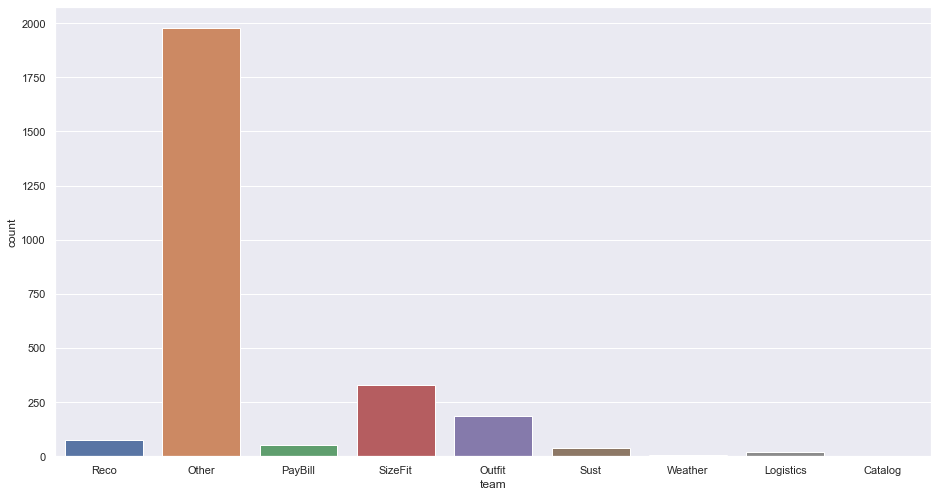

In [259]:
sns.countplot(data=teams, x='team')

<AxesSubplot:xlabel='team', ylabel='count'>

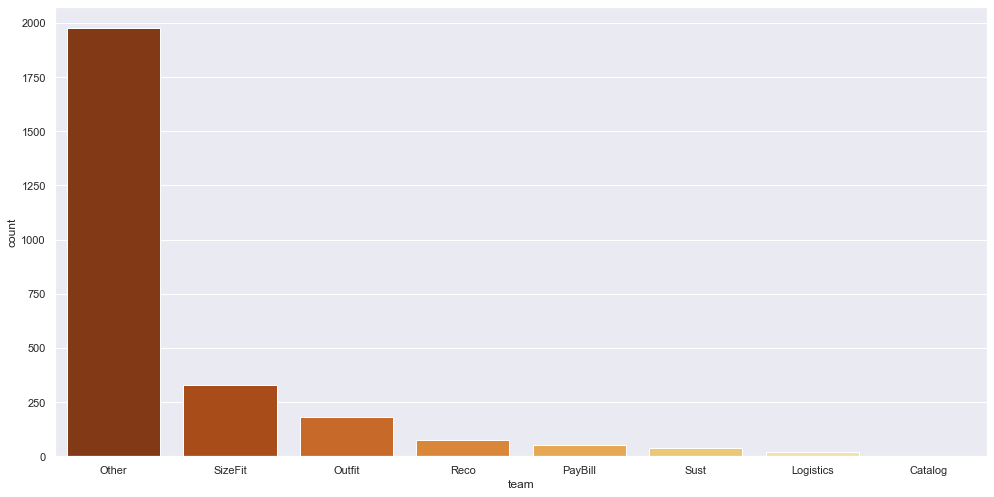

In [372]:
#distribution of tweets for topics
sns.set(rc={'figure.figsize':(16.7,8.27)})
cm = sns.color_palette("YlOrBr", as_cmap=True)
sns.countplot(data=teams, order = teams['team'].value_counts().index, x='team', palette="YlOrBr_r")

<AxesSubplot:xlabel='keyword', ylabel='count'>

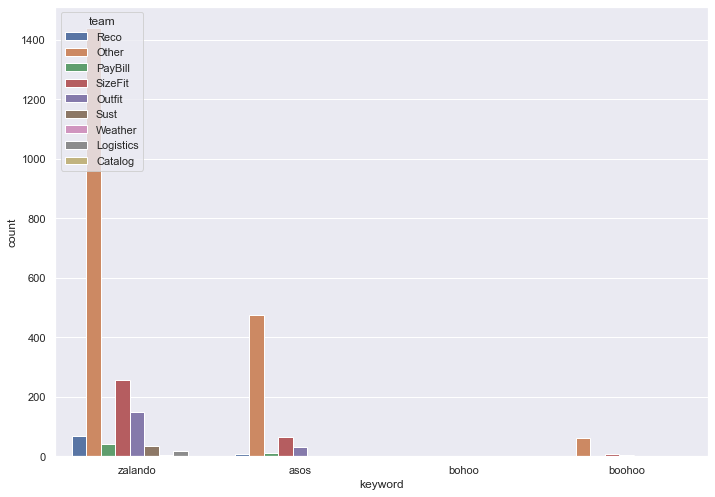

In [261]:
#distribition per topic per company
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data=teams, x='keyword',hue='team')


<AxesSubplot:xlabel='team', ylabel='count'>

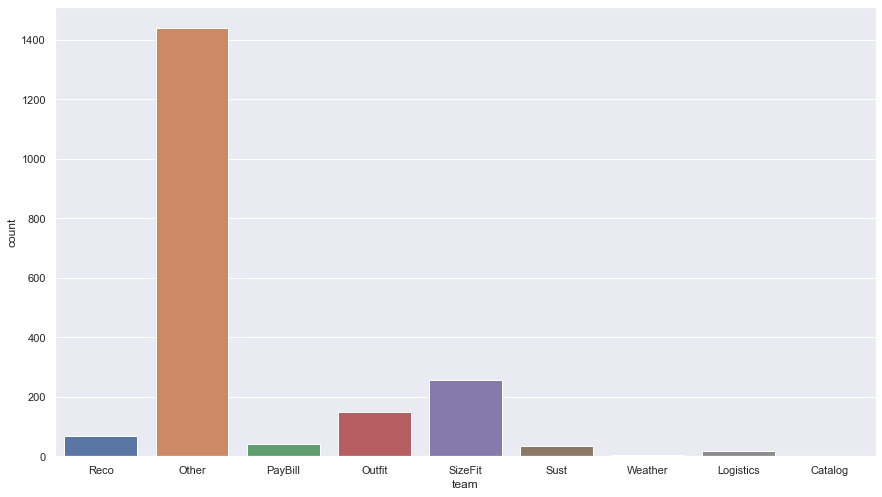

In [262]:
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.countplot(data=teams[teams['keyword']=='zalando'], x='team', orient='h')

In [263]:
zalando = teams[teams['keyword']=='zalando']

In [264]:
teams = teams[teams['keyword'].isin(['asos','zalando','boohoo'])]
teams = teams.drop(teams[teams['team']=='Weather'].index)


<AxesSubplot:xlabel='team', ylabel='compound'>

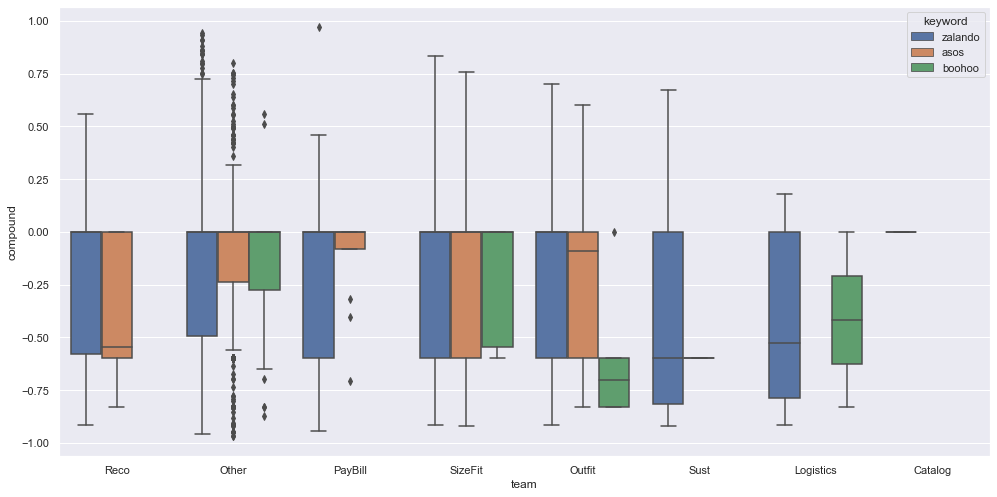

In [265]:
sns.set(rc={'figure.figsize':(16.7,8.27)})
sns.boxplot(x="team", y="compound", data=teams, hue='keyword')

In [266]:
import numpy as np
teams['sentiment'] = teams['compound']
teams['sentiment'] = np.where(teams['sentiment']>=0.5, 1, teams['sentiment'])
teams['sentiment'] = np.where(teams['sentiment']<=-0.5, -1, teams['sentiment'])
teams['sentiment'] = np.where((teams['sentiment']>-0.5)&(teams['sentiment']<0.5), 0, teams['sentiment'])

In [267]:
teams.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,...,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot,team,sentiment
0,1,1079317443523297280,12303,Boulder667,"@spdde @LadyBitchRay1 Viel Spaß, damit eine Wa...",0,"Liverpool, England",07-Mar-2021,116,False,...,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,viel spaß damit einen wahl gewinnen stellen si...,False,Reco,-1.0
1,4,310342425,11476,AndyBaldauf,@dicecco @Zalando aber erst wenn sie wieder dü...,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,...,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen verspielt,aber erst wenn sie wieder dürfen :-P,0.4995,aber erst wenn ich wieder dürfen verspielen,False,Other,0.0
2,10,793418126532734976,521,MILESmobility,Good News! Alle interessierten MitarbeiterInne...,0,"Berlin, Deutschland",05-Mar-2021,766,False,...,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,good news all interessieren mitarbeiterinnen d...,False,PayBill,-1.0
3,11,1119231287078858752,23,pici1303,@Zalando Ich weiß dass der Schein da rein muss...,0,,04-Mar-2021,0,False,...,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,ich weiß dass der schein rein muss aber sein m...,False,Other,0.0
4,12,1119231287078858752,23,pici1303,@Zalando Ich hab mich nur gefragt wofür dieser...,0,,04-Mar-2021,0,False,...,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,ich hab sich nur fragen wofür dies extra code ...,False,Other,0.0


In [268]:
pickle.dump(teams, open(r'.\data_n_models\5.de_df_teams_classified.pkl', 'wb'))

<AxesSubplot:xlabel='team', ylabel='count'>

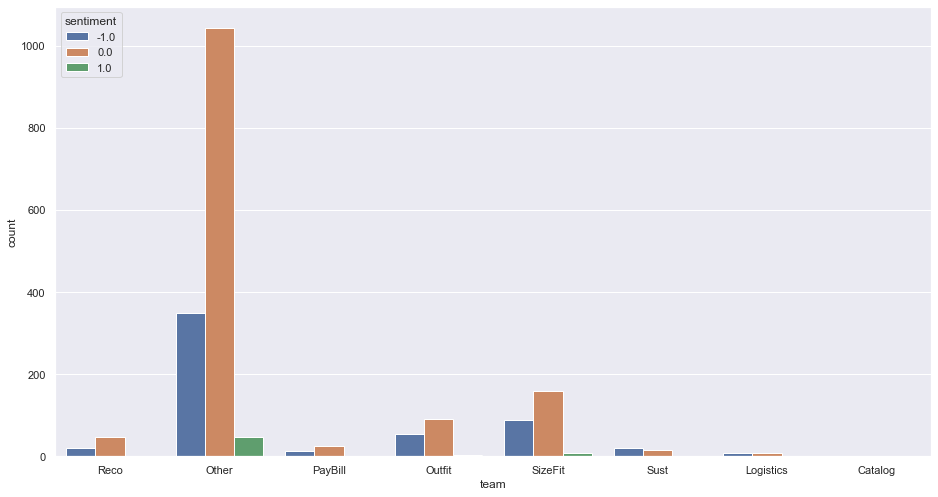

In [269]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.countplot(data=teams[teams['keyword']=='zalando'], x='team',hue='sentiment')

<AxesSubplot:xlabel='team', ylabel='count'>

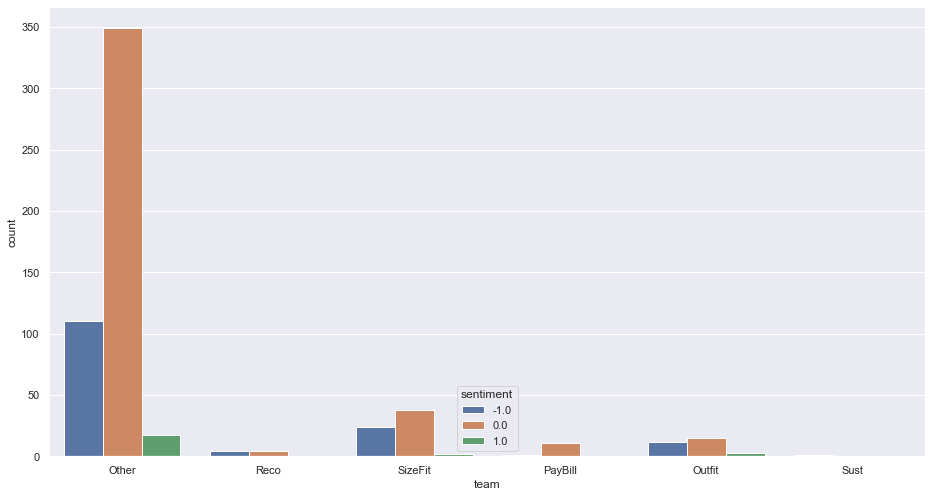

In [270]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.countplot(data=teams[teams['keyword']=='asos'], x='team',hue='sentiment')

In [271]:
teams.head()

,index,user_id,user_statuses,name,tweet,retweets,location,created,followers,is_user_verified,...,in_reply_to_status_id,keyword,language,clean,clean_vader,compound,lemma,bot,team,sentiment
0,1,1079317443523297280,12303,Boulder667,"@spdde @LadyBitchRay1 Viel Spaß, damit eine Wa...",0,"Liverpool, England",07-Mar-2021,116,False,...,1.368148e+18,zalando,de,viel spaß damit eine wahl gewinnen stellt euch...,"Viel Spaß, damit eine Wahl gewinnen. Stellt Eu...",-0.5994,viel spaß damit einen wahl gewinnen stellen si...,False,Reco,-1.0
1,4,310342425,11476,AndyBaldauf,@dicecco @Zalando aber erst wenn sie wieder dü...,0,Thurgau | St. Gallen | Zürich,06-Mar-2021,1848,False,...,1.368146e+18,zalando,de,aber erst wenn sie wieder dürfen verspielt,aber erst wenn sie wieder dürfen :-P,0.4995,aber erst wenn ich wieder dürfen verspielen,False,Other,0.0
2,10,793418126532734976,521,MILESmobility,Good News! Alle interessierten MitarbeiterInne...,0,"Berlin, Deutschland",05-Mar-2021,766,False,...,NaN,zalando,de,good news alle interessierten mitarbeiterinnen...,Good News! Alle interessierten MitarbeiterInne...,-0.7568,good news all interessieren mitarbeiterinnen d...,False,PayBill,-1.0
3,11,1119231287078858752,23,pici1303,@Zalando Ich weiß dass der Schein da rein muss...,0,,04-Mar-2021,0,False,...,1.367531e+18,zalando,de,ich weiß dass der schein rein muss aber ist mi...,Ich weiß dass der Schein rein muss aber was is...,0.0000,ich weiß dass der schein rein muss aber sein m...,False,Other,0.0
4,12,1119231287078858752,23,pici1303,@Zalando Ich hab mich nur gefragt wofür dieser...,0,,04-Mar-2021,0,False,...,1.367528e+18,zalando,de,ich hab mich nur gefragt wofür dieser extra co...,Ich hab mich nur gefragt wofür dieser extra Co...,0.0000,ich hab sich nur fragen wofür dies extra code ...,False,Other,0.0


In [272]:
# Extracting the nouns from the text data 
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
# Tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Annelie Schridde\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [324]:
teams['tokens'] = teams['lemma'].apply(lambda x: tokenizer.tokenize(x.lower())) # can't only use str as input need list of strings
teams['nouns'] = np.empty((len(teams), 0)).tolist()


In [319]:
for row in teams.index:
  teams.nouns[row].append([word for word,pos in pos_tag(teams.tokens[row]) if pos == 'NN'])

In [325]:
import spacy
nlp = spacy.load('de_core_news_sm')

for row in teams.index:
    doc = nlp(teams.lemma[row])
    for i in doc:
        if i.tag_ == 'NN':
            teams.nouns[row].append(i)
        
    

In [362]:
#[' '.join(list([token.text for token in document] for document in teams.nouns))]
' '.join(list(itertools.chain.from_iterable([[token.text for token in document] for document in teams.nouns]))).split()

['wahl',
 'höhe',
 'bild',
 'muss',
 'mahnung',
 'rabatt',
 'tag',
 'trap',
 'boutique',
 'kategorie',
 'snacks',
 'bild',
 'dienstag',
 'druck',
 'muss',
 'doku',
 'schrank',
 'findom',
 'pressemitteilung',
 'gewinn',
 'idee',
 'versand',
 'index',
 'leitin',
 'aids',
 'hellofresh',
 'zeit',
 'neubewertung',
 'aktien',
 'zal',
 'index',
 'index',
 'depot',
 'porsche',
 'pah',
 'geld',
 'druck',
 'gewinner',
 'kollegen',
 'tag',
 'jahre',
 '\u200d',
 'tür',
 'frauenquote',
 'aws',
 'geb',
 'märz',
 'höhe',
 'kauf',
 'lieferung',
 'sachen',
 'seiten',
 'zeit',
 'heller',
 'umwelt',
 'muss',
 'bild',
 'status',
 'meinen',
 'muss',
 'bild',
 '’s',
 'ziel',
 'version',
 'weltfrauentag',
 'sohn',
 'mutter',
 'uhr',
 'onlinehandel',
 'aktie',
 'index',
 'profiteur',
 'zeit',
 'nen',
 'meinen',
 'rückerstattung',
 'kitty',
 'woche',
 'ziel',
 'ziel',
 'inklusion',
 'chat',
 'rückerstattung',
 'rückerstattung',
 'edwards',
 'ding',
 'einzelhandels',
 '’s',
 'mitarbeiter',
 'aktien',
 'zal',
 '

In [289]:
mask = np.array(Image.open("data_n_models\cloud.png"))
WordCloud(teams.nouns, background_color='white', mask = mask, max_words=500, stopwords=stopwords, repeat=False)


Word Cloud Saved Successfully


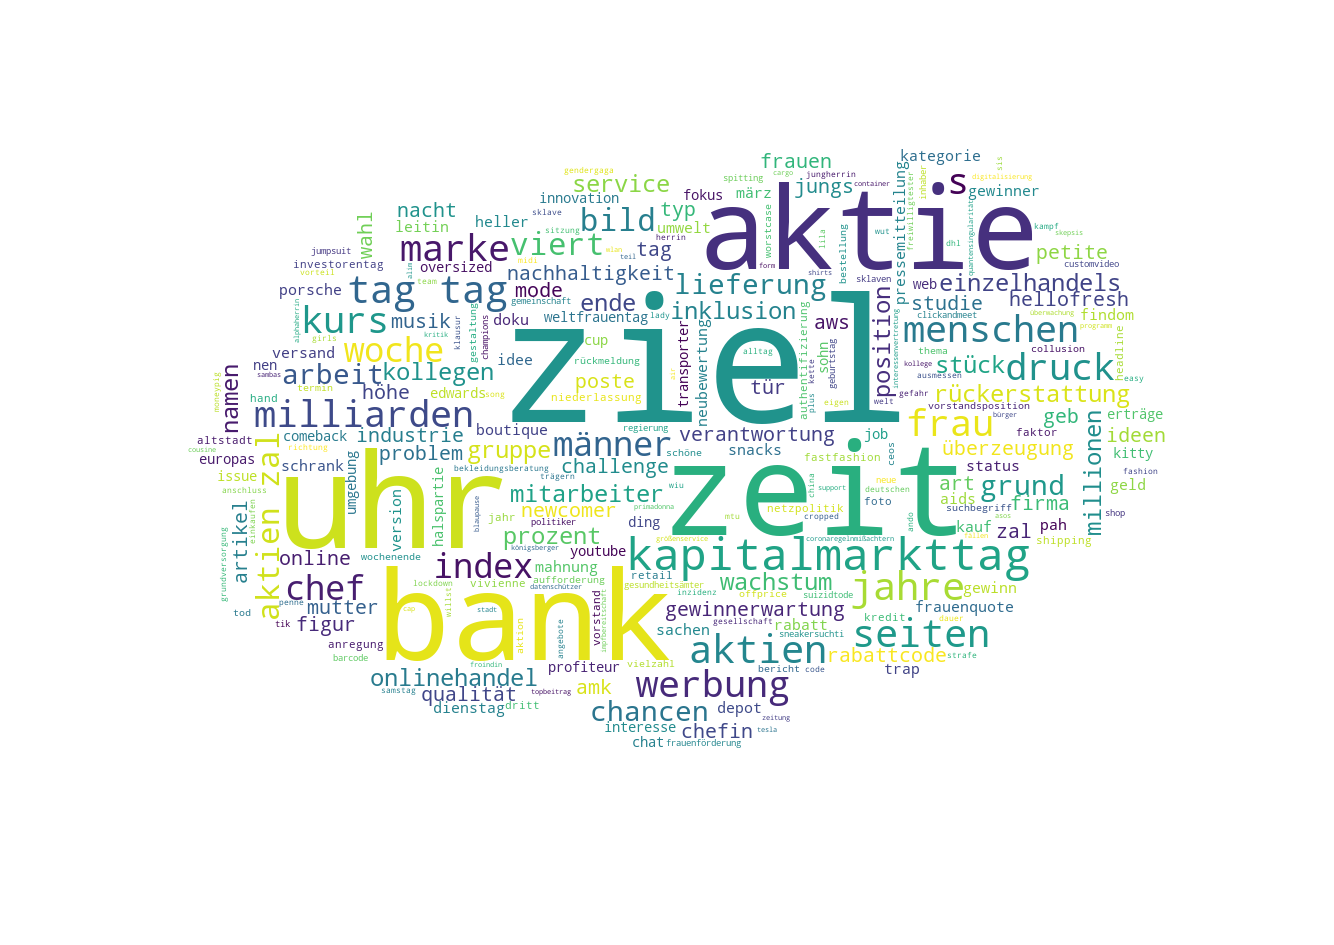

In [376]:
from PIL import *
from nltk.corpus import stopwords
import itertools

stopwords = stopwords.words('german')
stopwords.extend(["boohoo","boohoo'" "asos","asos'",'Zalando','zalando','fuck', "zalando",'bitch','shit', 'amazon', 'asos ', 'zalando ', ' asos', ' zalando', 'afx', "zalando'", "asos'", "geldherrin", "scheiss"])

# Function to create a wordcloud
def create_wordcloud(tweet, path='data_n_models\wc_pos_de.png'):
    """ this function takes in two arguments, the path to save the file and the tweet"""
    mask = np.array(Image.open("data_n_models\cloud.png"))
    wc = WordCloud(background_color='white', mask = mask, max_words=500, stopwords=stopwords, repeat=False)
    #tweet = [' '.join(list(itertools.chain.from_iterable(tweet))) for tweet in tweet]
    tweet = ' '.join(list(itertools.chain.from_iterable([[token.text for token in document] for document in tweet])))
    #tweet = ' '.join(str(v) for v in tweet).strip()
    #tweet = [tweet.strip("'") for tweet in tweet]
    wc.generate(str(tweet))
    wc.to_file(path)
    print('Word Cloud Saved Successfully')
    display(Image.open(path))
#Creating wordcloud for all tweets
create_wordcloud(teams['nouns'].values)

Word Cloud Saved Successfully


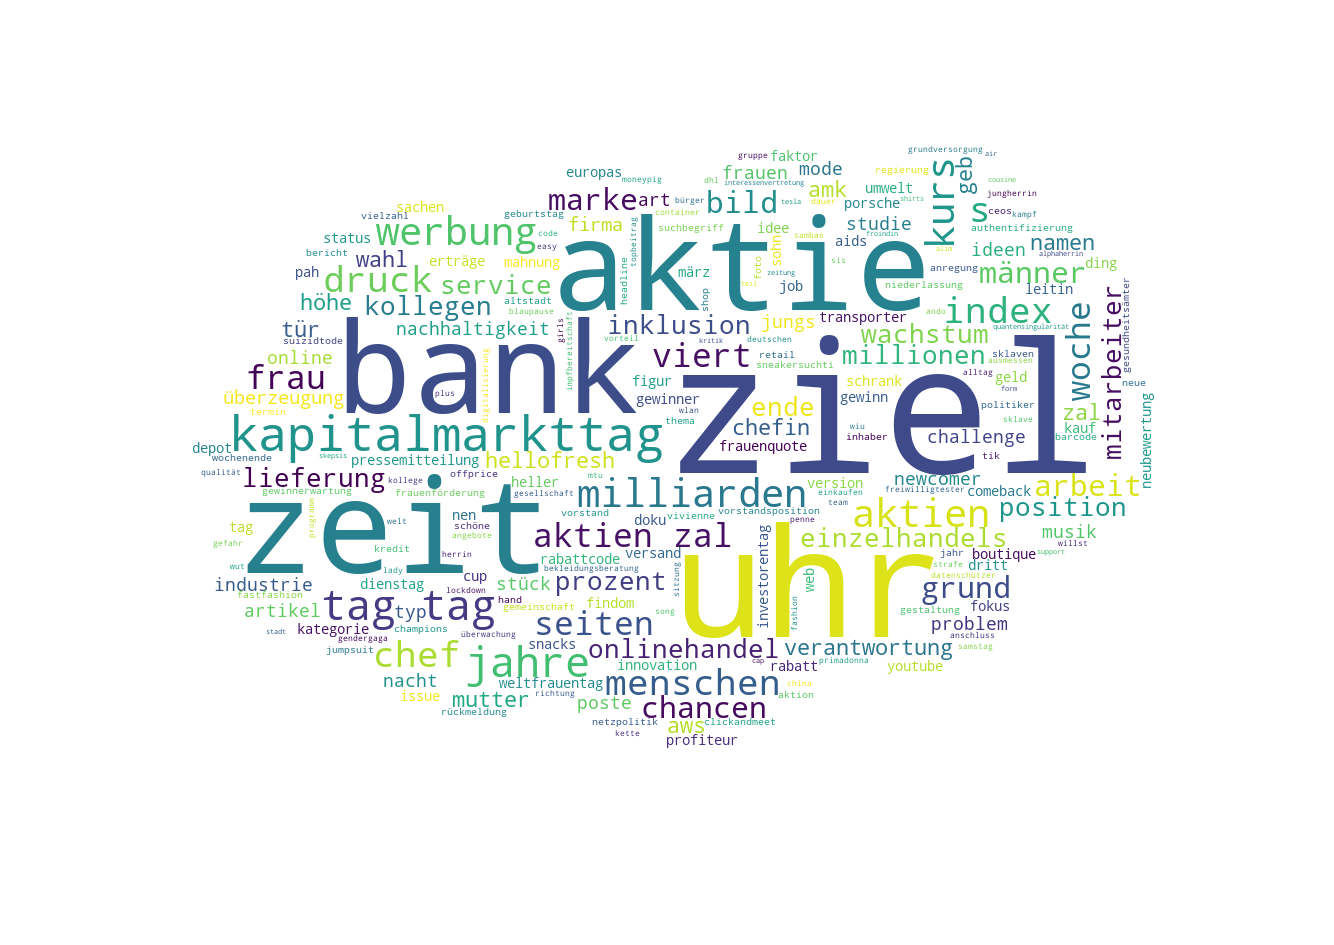

In [379]:
#Creating wordcloud for all Zalando
zalando = teams[teams['keyword']=='zalando']
create_wordcloud(zalando.nouns.values)

Word Cloud Saved Successfully


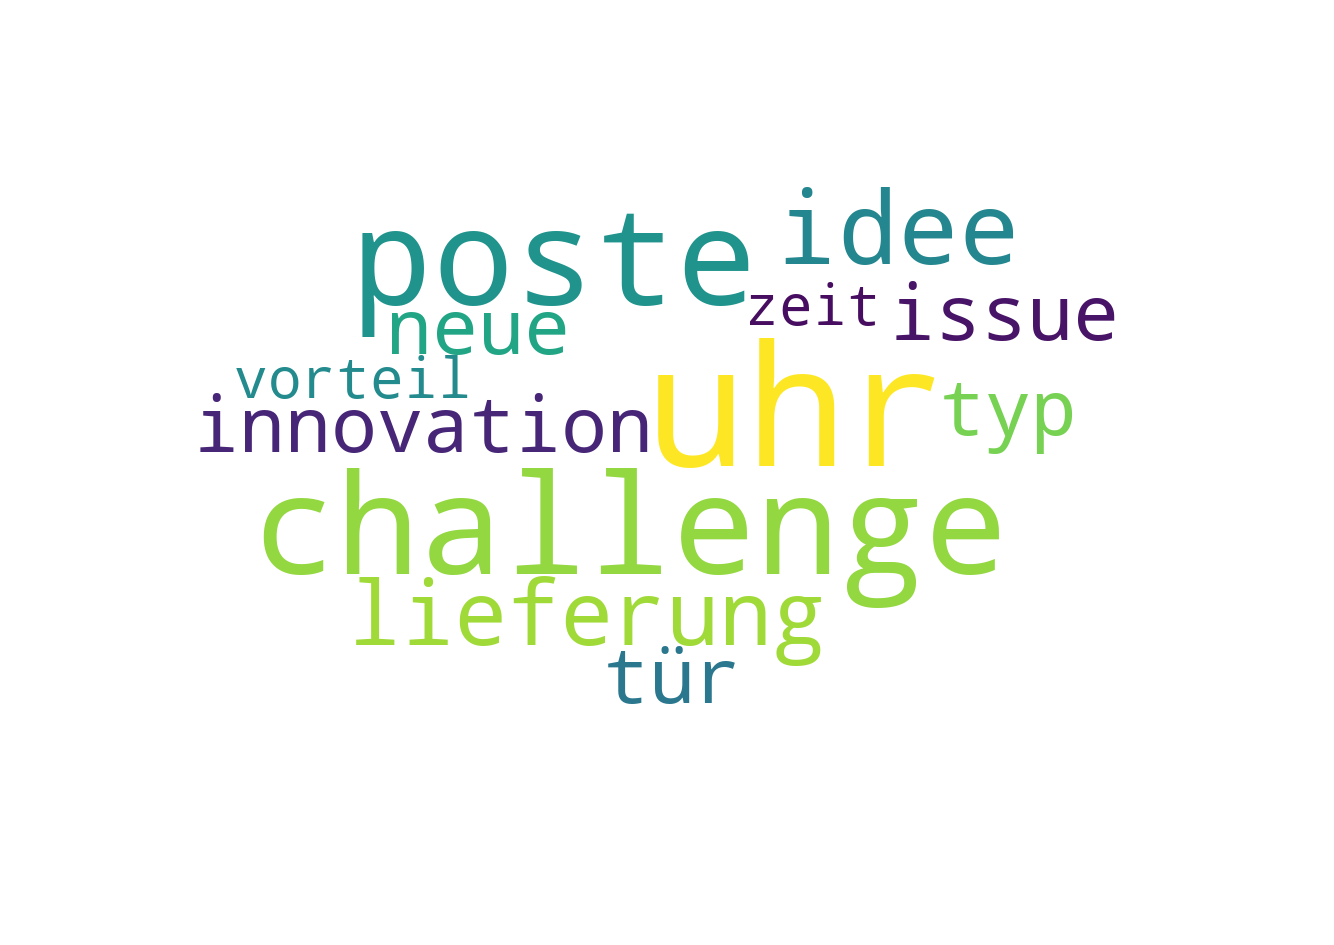

In [365]:
#Creating wordcloud for positive Zalando
pos_zalando = zalando[zalando['sentiment']==1]
create_wordcloud(pos_zalando.nouns.values)

Word Cloud Saved Successfully


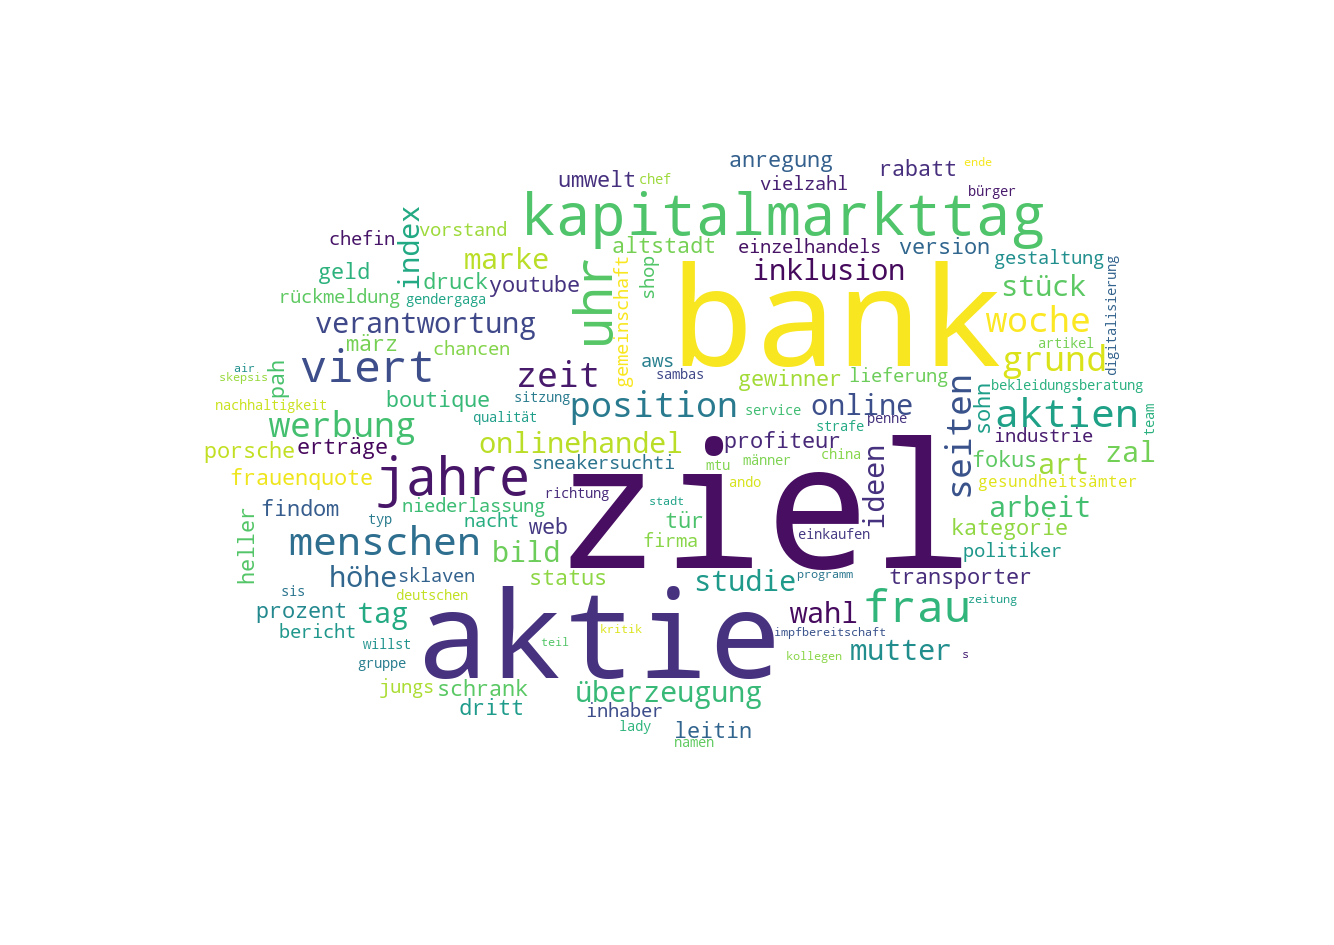

In [366]:
#Creating wordcloud for negative Zalando
neg_zalando = zalando[zalando['sentiment']==-1]
create_wordcloud(neg_zalando.nouns.values)

### ASOS

Word Cloud Saved Successfully


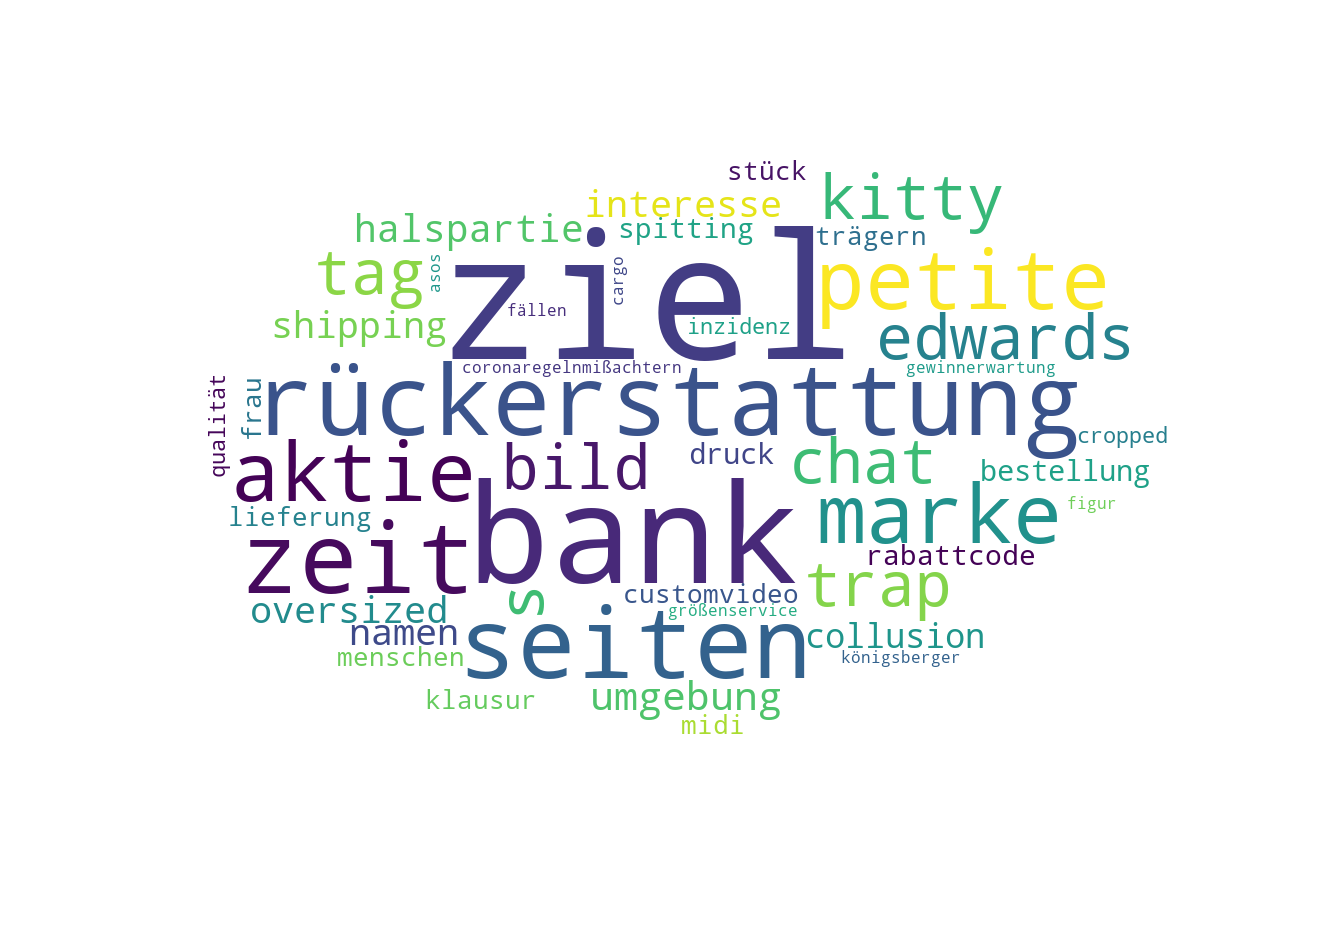

In [377]:
#Creating wordcloud for all Zalando
asos = teams[teams['keyword']=='asos']
create_wordcloud(asos.nouns.values)

### Boohoo

Word Cloud Saved Successfully


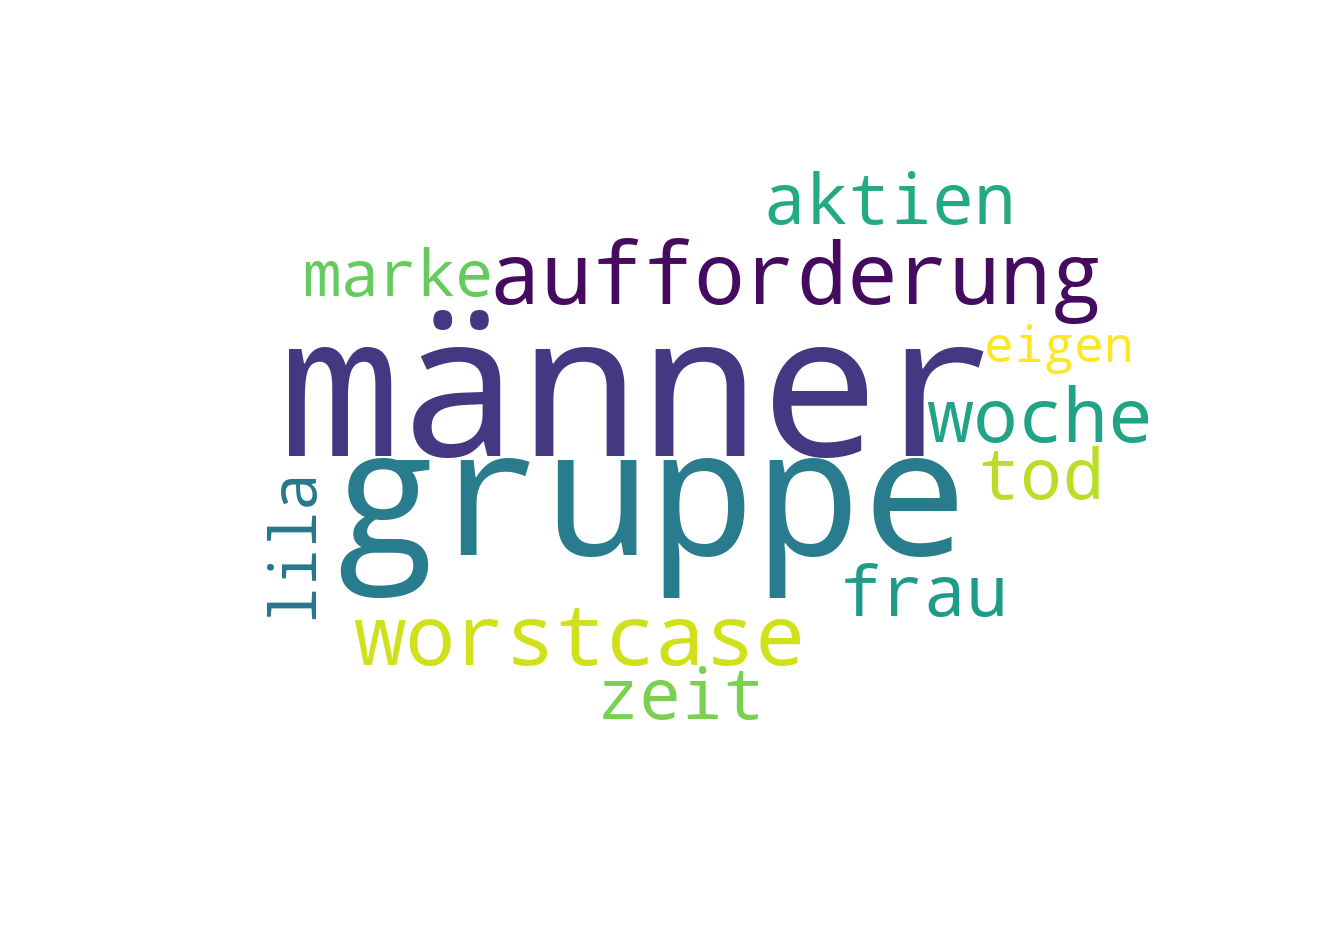

In [378]:
#Creating wordcloud for all Zalando
asos = teams[teams['keyword']=='boohoo']
create_wordcloud(asos.nouns.values)

# clustering with LatentDirichletAllocation

https://ourcodingclub.github.io/tutorials/topic-modelling-python/

# on the whole dataset

In [33]:
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=30, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(data['lemma']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [34]:
 # Each row is a tweet and each column is a word. The numbers in each position tell us how many times this word appears in this tweet.
 tf

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
print(tf_feature_names)

['aber', 'afx', 'aktie', 'aktien', 'aktiencheck', 'all', 'alle', 'als', 'amazon', 'analyser', 'ander', 'asos', 'auch', 'auf', 'aus', 'bei', 'beim', 'bekommen', 'belassen', 'belässt', 'bestellen', 'bestellung', 'bis', 'bitte', 'boohoo', 'corona', 'damit', 'danke', 'dann', 'dass', 'der', 'deutsch', 'deutschen', 'deutschland', 'dies', 'doch', 'dpa', 'durch', 'dürfen', 'echt', 'ecommerce', 'eigentlich', 'ein', 'einen', 'einer', 'einfach', 'einstufung', 'erst', 'erwarten', 'etwas', 'euro', 'fashion', 'finanztreff', 'finden', 'fragen', 'frau', 'für', 'ganz', 'geben', 'gehen', 'geld', 'gerade', 'gibts', 'groß', 'gut', 'gutschein', 'gutscheine', 'hab', 'habe', 'haben', 'halt', 'heute', 'hier', 'hosen', 'ich', 'immer', 'jahr', 'jed', 'jemand', 'jetzt', 'kaufen', 'kein', 'klamotten', 'kommen', 'kursziel', 'können', 'lieb', 'machen', 'mal', 'man', 'mehr', 'mein', 'meinen', 'mit', 'modehändler', 'morgen', 'muss', 'mögen', 'nach', 'nehmen', 'neu', 'neue', 'new', 'nicht', 'nichts', 'nie', 'noch', 'n

In [23]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 9

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [24]:
model.fit(tf)

LatentDirichletAllocation(n_components=9, random_state=0)

In [25]:
#	Calculate approximate log-likelihood as score.
model.score(tf)

-105511.55591316626

In [26]:
def display_topics(model, feature_names, no_top_words):
    """a function which takes in our model object model, the order of the words in our matrix tf_feature_names and the number of words we would like to show. Use this function, which returns a dataframe, to show you the topics we created. Remember that each topic is a list of words/tokens and weights"""
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [27]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights
0,der,465.7,der,247.7,der,235.3,der,274.8,der,457.4,der,715.2,ich,641.1,zalando,253.4,zalando,297.7
1,und,308.1,asos,242.9,zalando,164.5,auf,244.5,ich,199.0,zalando,342.2,asos,173.5,sich,229.4,oder,164.4
2,zalando,300.0,sein,219.7,nur,143.7,zalando,157.9,können,193.8,werden,152.3,bei,168.3,mein,125.3,bei,148.8
3,von,179.8,aber,164.4,sein,134.0,euro,142.5,zalando,185.8,und,150.9,bestellen,166.4,für,93.9,mal,69.8
4,sein,164.7,auch,158.7,nicht,116.7,für,127.7,haben,161.6,mit,115.2,sich,161.6,ein,88.5,asos,61.5
5,amazon,109.5,und,142.0,noch,94.3,dpa,110.1,nicht,160.3,einen,88.1,und,154.0,heute,64.3,geben,58.7
6,mit,107.0,ich,137.2,ich,92.2,afx,110.1,sich,134.0,dies,82.7,hab,143.7,haben,58.7,der,39.5
7,aus,97.0,haben,88.9,und,85.4,von,91.9,und,113.7,für,81.4,der,138.6,gutschein,58.6,deutschen,36.1
8,einen,85.8,immer,75.5,mein,75.0,haben,89.2,mein,108.6,sein,81.1,habe,134.1,von,56.9,aktien,33.4
9,ander,65.1,sich,74.7,bei,74.8,ziel,89.1,wie,105.1,zur,64.6,sein,127.1,meinen,54.1,vielleicht,33.1


# Zalando only

In [28]:
data_zal = data[data['keyword']=='zalando']

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=30, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(data_zal['lemma']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

number_of_topics = 9

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)

no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights
0,sich,259.8,der,244.6,der,193.4,und,282.7,ich,409.8,zalando,309.0,der,376.7,ich,239.9,der,653.1
1,zalando,235.5,auf,225.2,zalando,161.7,zalando,252.1,der,293.2,oder,134.6,mein,231.0,zalando,176.9,zalando,194.4
2,ich,68.7,zalando,202.7,bei,104.0,der,203.7,sein,180.0,mit,111.0,zalando,126.9,bei,172.4,sein,150.5
3,heute,61.1,euro,164.1,auch,96.3,werden,113.5,zalando,148.6,von,90.5,und,103.8,bestellen,118.1,und,143.3
4,und,55.0,für,105.4,man,95.5,amazon,99.2,sich,147.7,der,83.4,sich,100.4,hab,97.7,einen,101.8
5,gutschein,52.6,haben,89.3,nicht,93.4,von,83.9,haben,122.6,sein,82.1,wie,60.6,aber,83.3,online,83.3
6,mit,52.2,afx,79.1,gut,81.3,nach,80.2,nicht,108.6,geben,54.8,sein,60.3,sein,68.6,mit,76.2
7,mein,51.1,dpa,79.1,sein,79.5,zur,60.1,und,91.3,einen,49.2,für,56.4,noch,52.1,werden,58.5
8,ein,43.8,von,77.5,können,74.9,für,47.2,einen,88.3,dies,39.0,einen,54.0,der,47.2,von,49.3
9,jetzt,43.5,einer,72.3,und,70.2,ein,41.5,dass,88.3,als,36.2,haben,50.4,und,45.6,corona,44.1


# Zalando positive

In [30]:
data_zal_pos = data[data['compound'] > 0.5]

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=30, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(data_zal['lemma']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

number_of_topics = 9

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)

no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights
0,sich,259.8,der,244.6,der,193.4,und,282.7,ich,409.8,zalando,309.0,der,376.7,ich,239.9,der,653.1
1,zalando,235.5,auf,225.2,zalando,161.7,zalando,252.1,der,293.2,oder,134.6,mein,231.0,zalando,176.9,zalando,194.4
2,ich,68.7,zalando,202.7,bei,104.0,der,203.7,sein,180.0,mit,111.0,zalando,126.9,bei,172.4,sein,150.5
3,heute,61.1,euro,164.1,auch,96.3,werden,113.5,zalando,148.6,von,90.5,und,103.8,bestellen,118.1,und,143.3
4,und,55.0,für,105.4,man,95.5,amazon,99.2,sich,147.7,der,83.4,sich,100.4,hab,97.7,einen,101.8
5,gutschein,52.6,haben,89.3,nicht,93.4,von,83.9,haben,122.6,sein,82.1,wie,60.6,aber,83.3,online,83.3
6,mit,52.2,afx,79.1,gut,81.3,nach,80.2,nicht,108.6,geben,54.8,sein,60.3,sein,68.6,mit,76.2
7,mein,51.1,dpa,79.1,sein,79.5,zur,60.1,und,91.3,einen,49.2,für,56.4,noch,52.1,werden,58.5
8,ein,43.8,von,77.5,können,74.9,für,47.2,einen,88.3,dies,39.0,einen,54.0,der,47.2,von,49.3
9,jetzt,43.5,einer,72.3,und,70.2,ein,41.5,dass,88.3,als,36.2,haben,50.4,und,45.6,corona,44.1


# keyword approach

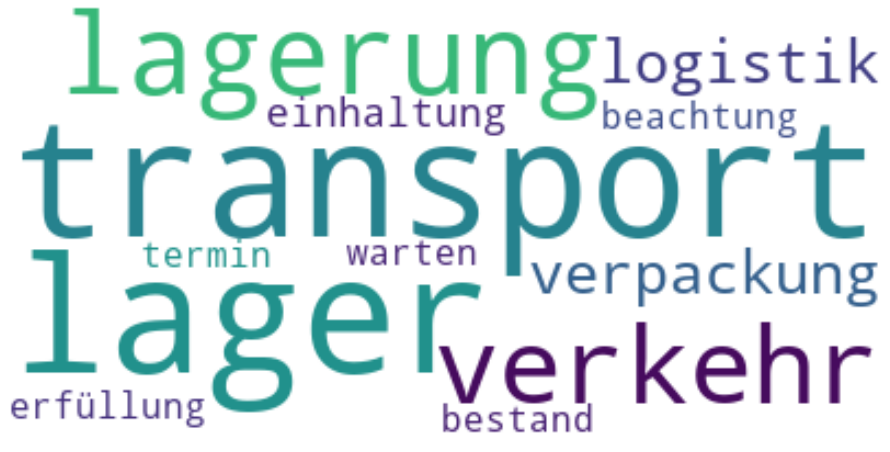

In [37]:
#generation of pictures for presentation
wc = WordCloud(background_color='white', max_words=500, repeat=False)
wc.generate('transport|lager|lagerung|verkehr|verpackung|logistik|einhaltung|erfüllung|beachtung|warten|termin|bestand')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Top 10 worst and best tweets

In [382]:
#top 10 negative tweets about Zalando
for i, tweet in teams[teams['keyword']=='zalando'].sort_values(by='compound')[:10].iterrows():
    print(i, ':   ', tweet.tweet)

2579 :    @RainerRdi @DrDupsky @Juergen_Kaiser @oekofuzzi @elemob_de Da stellt sich auch die Frage, wem die Stadt am Ende gehört? Chinesischen Staatskonzernen, subventioniert? Weil Sie das "Risiko" aufgenommen und investiert haben? Oder Zalando (machen die ja schon)? Oder kauft Google mal eben die halbe Stadt? So soll das richtig sein?
2007 :    @FridayForFuture Ja genau, die ganzen Frauen, die sich 1.000 Schuhe bei Zalando bestellen und die 1.000 mal hin-und herschicken weil die ja auf dem Foto viel besser aussahen, tragen natürlich garnichts zu irgend einer CO²-Bilanz bei. Is klar.
1669 :    @tagesschau Ein Schlag in die Fresse für all die Paketboten, die bei Wind und Wetter bis spät Abends die Zalando Pakete ausliefern dürfen
1945 :    Expedia, Zalando, Audible, Pampers.
Werbeblock eben bei pro7, Firmen, die mich als Kunden nicht mehr benötigen. Gut, die Pampers-Zeiten sind vorbei und die bessere Zielgruppe mit Sicherheit PoC. Aber sonst? Und das war jetzt nur eine Momentaufnahme
11

In [383]:
for i, tweet in teams[teams['keyword']=='zalando'].sort_values(by='compound')[10:].iterrows():
    print(i, ':   ', tweet.tweet)

2309 :    @Hagelueken @boeckler_de Bei allen Bequemlichkeiten, die uns die Digitalisierung so bringt, dürfen wir nicht die Schattenseiten ausblenden! Ein wunderbarer Kommentar, Herr Hagelüken, zu den Praktiken vieler Digitalkonzerne. #Zalando ist kein Einzelfall, das ganze hat System. #digitalisierung #datenschutz
1323 :    @ApothekeAdhoc @Zalando Wie so oft: die Apothekerin dürfen es in den Markt bringen. Verdienen wenig damit und wenn die Marke richtig bekannt ist und läuft, dann kommen die Umsatzdiebe!
1943 :    Heutzutage nur noch Werbung die nerven soll von Zalando und anderen Service-Unternehmen die auf ...ando.de enden. Damals hat man noch ordentlich an die Emotionen appelliert!
276 :    Morgen kommt mein Päckchen von Zalando und ich freue mich drauf die Sachen in Ruhe anzusehen und anzuprobieren.
Und das alles ohne Termin, Zeitdruck, Maske, Ausweis und einer Verkäuferin die nach 10 Minuten auf die Uhr sieht. https://t.co/1nRQwlzigB
898 :    Astrid Arndt wird als Personal-Chefin

In [384]:
for i, tweet in teams[teams['keyword']=='asos'].sort_values(by='compound')[:10].iterrows():
    print(i, ':   ', tweet.tweet)

1166 :    Da ich meine Mitbürger jetzt 12+ Monate kennenlernen durfte, weiss ich, wie es abläuft. Die Asos und die Faschisten machen Demo und Urlaub und der Rest guckt in die Röhre. Und bei den Querdenker-Demos schauen die Scheiss Bullen bundesweit zu wie sich die braune Masse aufführt. https://t.co/0W80ZYyLvJ
237 :    @gesorum asos tall. war aber eher glücksgriff. hab relativ viele bestellt gehabt und das war die einzige die gut war
2489 :    ▶ dpa-AFX: JPMorgan belässt Asos auf 'Overweight' - Ziel 6800 Pence: NEW YORK (dpa-AFX Analyser) - Die US-Bank JPMorgan hat die Einstufung für Asos auf "Overweight" mit einem Kursziel von 6800 Pence belassen. Die Verbraucher dürften viele… https://t.co/FXJbKSHmX5 FINANZTREFF
2488 :    ▶ JPMorgan belässt Asos auf 'Overweight' - Ziel 6800 Pence: NEW YORK (dpa-AFX Analyser) - Die US-Bank JPMorgan hat die Einstufung für Asos auf "Overweight" mit einem Kursziel von 6800 Pence belassen. Die Verbraucher dürften viele während des… https://t.co/kDOf0eoJl4

In [385]:
for i, tweet in teams[teams['keyword']=='asos'].sort_values(by='compound')[10:].iterrows():
    print(i, ':   ', tweet.tweet)

1719 :    @miedsekadse Die mit Perlen aus einem kristallladen, die andere von ASOS und Die mit den Augen hab ich unter Augen Accessoires bei vinted gefunden aber ich hab sie modifiziert und gekürzt und eine hinzu gemacht
2477 :    @grauersweater digga ich bin nicht asos denkst du ich hab bock die scheisse auszumessen und guck mal wie die schreibt die ist richtig nervig penetrant
336 :    Hab mir eine Jeans bei Asos bestellt. Die war einfach 10 Nummern zu groß. Kb wieder wie ein Retard zur Poststelle zu gehen
389 :    @itsmejiline hab mir neulich erst hosen auf asos bestellt und fr, selbst die jeans und ich finde jeans vor allem weitere jeans sind das größte problem, selbst die saßen gut am po
1803 :    @TuerkSeyda @DannyHillborou1 @BA_Mitte_Berlin Ohne drastische Maßnahmen wird die Stadt vermüllen. Seht euch um, überall immer mehr Asos die ihren Dreck einfach fallen lassen. Aber Zwang und Konsequenzen kennen Gutmenschen nicht.
1381 :    @kacy_rogue PLSSSS bin grade auf asos und suche n

In [386]:
for i, tweet in teams[teams['keyword']=='boohoo'].sort_values(by='compound')[:10].iterrows():
    print(i, ':   ', tweet.tweet)

2502 :    @Kiki1Bail Damit man dann auf die EU hinhauen kann. "Die anderen kriegen's und wir nicht!! Boohoo!!"
1385 :    @sagersmawallah Die ist schon besser, sind die sachen von boohoo gut hab da noch nie bestellt
1198 :    Trotz der Skandale wird Fast Fashion immer erfolgreicher. 2019 verzeichnete PrettyLittleThing einen Umsatz von 400 Mio. Euro. Die Gruppe Boohoo, zu der die Marke gehört, kam fast an 1 Mrd. ran. (7/9) https://t.co/Dtyk8IHsr3
1809 :    Ein Frachter verstopft den Transportweg zwischen Asien und Europa. Vielleicht ein guter Anlass für den Handel, die eigenen Lieferketten einmal mehr oder überhaupt unter die Lupe zu nehmen.
https://t.co/3YwIABPkR2
1181 :    @Mini_Malismo @rudifussi Boohoo, Coronaleugner und -verharmloser politisieren schon die ganze Zeit die Gesundheit des gesamten Volkes.
2291 :    Das sind Mahmoud und Umar Kamani, sie sind durch die Modekette Boohoo Milliardäre geworden. Diese Kette verkauft zu Spottpreisen Kleidung. Hergestellt wird diese Kleidung un

In [387]:
for i, tweet in teams[teams['keyword']=='boohoo'].sort_values(by='compound')[10:].iterrows():
    print(i, ':   ', tweet.tweet)

2289 :    @hassan_dior boohoo (ja ka was das ist) aber das shirt gab es auch mal bei urban outfitters + das ist das letzte shirt in meiner größe. Es war gestern sogar ausverkauft
1195 :    In welchem Film lebt er lmao wir sollen an die armen Männer denken weil die sich verarscht fühlen boohoo :(( https://t.co/cZRkpkmM3h
2293 :    @ganzseanfresh oft schon bei boohoo bestellt, sehr wilder shop. Preisleistung sehr gut, lass dich von den anderen nich verarschen, die erwarten von 20€, prada qualität
1082 :    vielleicht sollte ich mir diese tasche kaufen und hoffen dass jemand die aufforderung versteht 😂 https://t.co/N5Zd6mPyXl
1660 :    @like2belou undurchsichtig, weil jeder Kleidungshersteller seine Ware von woanders bezieht. Außerdem bietet die Boohoo Gruppe verglichen mit Inditex und H&amp;M noch günstiger an, also praktisch noch eine Stufe höher zur Fast Fashion. Dadurch wird der Käufer angeregt, schneller auf neue
1488 :    @NrXVPhea @YokiSayukr1 Theoretisch gesehen ist es nicht der r